In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import timedelta
from sklearn.metrics import root_mean_squared_error
import pickle
from prepare_data import PrepareData
from pmdarima.arima import auto_arima


c:\Users\krist\work\university\year2\semester2\data analysis\final-model\training\prepare_data.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample("6H")


Get Data

In [2]:
df = PrepareData.df
train_data = PrepareData.train_data()
test_data = PrepareData.test_data()

In [ ]:
attr = "humidity"

# Training sarima to predict the humidity 

## EDA

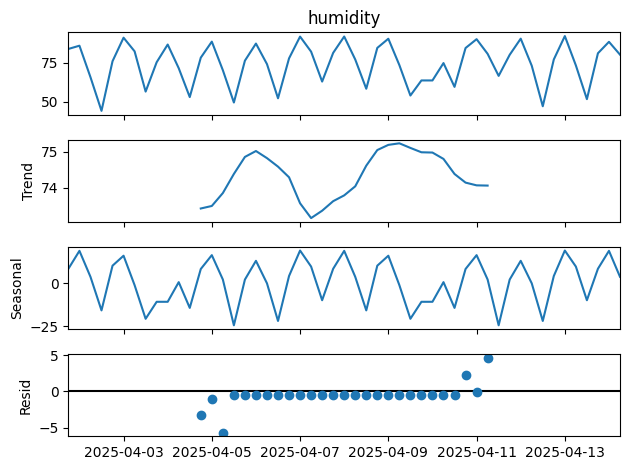

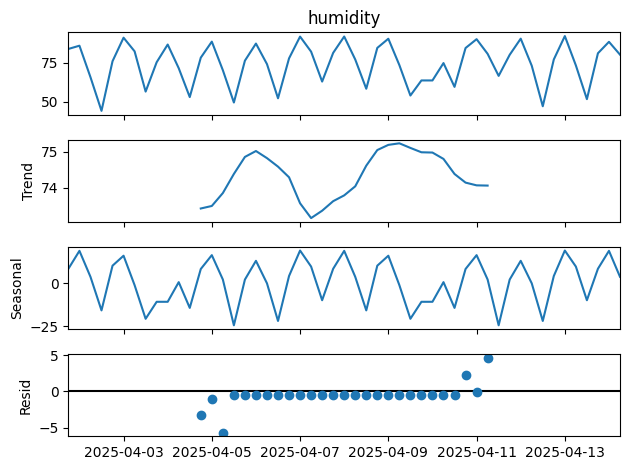

In [4]:
seasonal_decompose(df[attr].interpolate(), model="additive").plot()

In [5]:
diffed_data = df[attr].dropna()
diff = 0
while True:
    result = adfuller(diffed_data)
    if result[1] < 0.05 or result[0] < result[4]["5%"]:
        print(f"d={diff}")
        print('ADF Statistic:', result[0])
        print('p-value:', result[1])
        for key, value in result[4].items():
            print('Critial Values:')
            print(f'   {key}, {value}')
        break
    diffed_data = diffed_data.diff().dropna()
    diff+=1

d=0
ADF Statistic: -3.457998537272079
p-value: 0.009133620625141975
Critial Values:
   1%, -3.596635636000432
Critial Values:
   5%, -2.933297331821618
Critial Values:
   10%, -2.6049909750566895


Use d=1.

### Find the P parameter

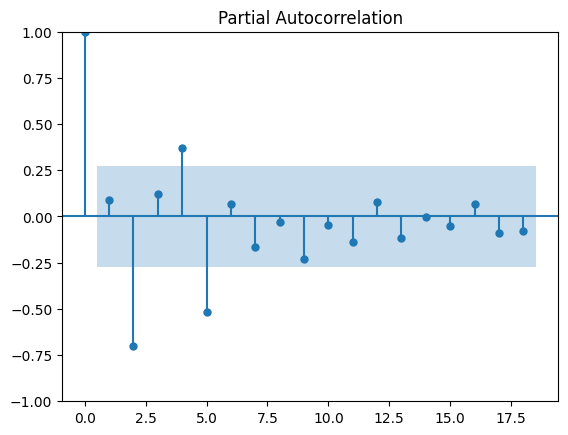

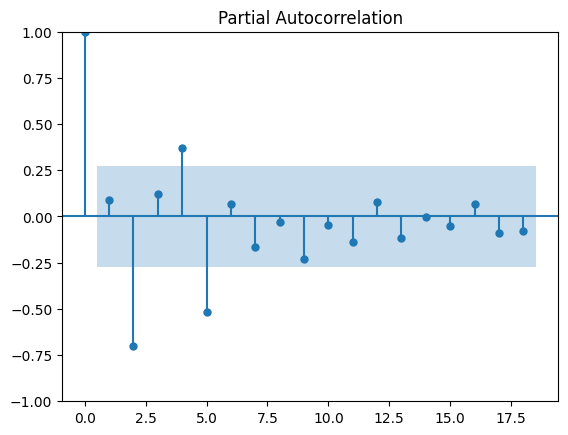

In [6]:
plot_pacf(diffed_data)

Fill this in, also check other files if this is correct.

### Find the Q parameter

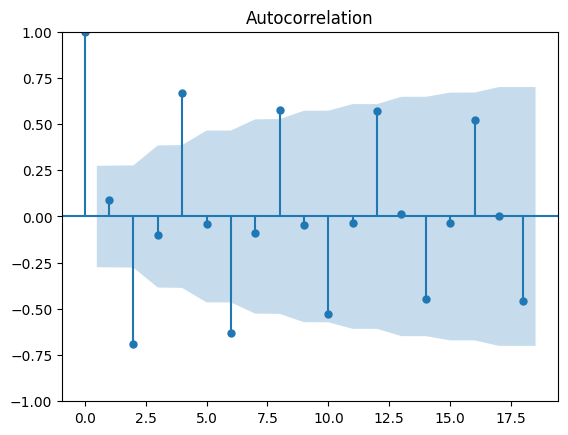

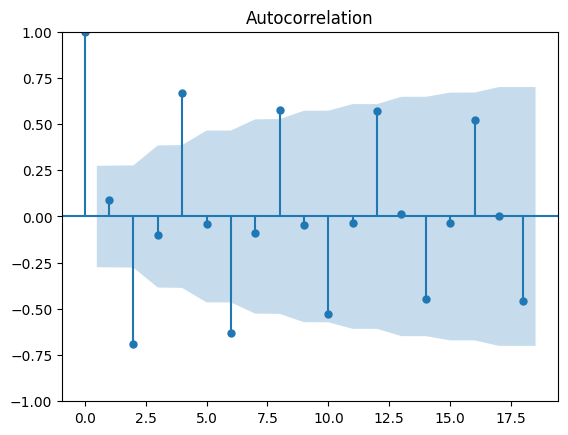

In [7]:
plot_acf(diffed_data)

Fill this in, also check other files if this is correct.

## Pre-Processing

Fill in missing value (lost due to server outage)
Use ffill, which replace NULL values with the value from the previous row.

In [8]:
train_data[attr] = train_data[attr].ffill()
test_data[attr] = test_data[attr].ffill()

C:\Users\krist\AppData\Local\Temp\ipykernel_24140\2514631960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[attr] = train_data[attr].ffill()
C:\Users\krist\AppData\Local\Temp\ipykernel_24140\2514631960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[attr] = test_data[attr].ffill()


## Train the model

In [ ]:
# Use auto_arima to find the best model parameters
model = auto_arima(
    train_data[attr],
    seasonal=True,
    m=4,  # Seasonality settings
    d=0, # set to match d in EDA (I think)
    D=0,
    max_p=3,
    max_q=3,
    max_P=2,
    max_Q=2,
    trace=True,
    error_action="ignore",
    suppress_warnings=True,
    stepwise=True,
)

c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[4] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[4] intercept   : AIC=237.275, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[4] intercept   : AIC=196.102, Time=0.13 sec


c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[4] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[4]             : AIC=335.158, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[4] intercept   : AIC=239.246, Time=0.02 sec


c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,0)[4] intercept   : AIC=194.636, Time=0.21 sec


c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,1)[4] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,0,0)(1,0,1)[4] intercept   : AIC=196.372, Time=0.18 sec


c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,0,0)[4] intercept   : AIC=199.635, Time=0.20 sec


c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,0,0)[4] intercept   : AIC=215.783, Time=0.23 sec


c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,0)[4] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(0,0,1)(2,0,0)[4] intercept   : AIC=188.307, Time=0.19 sec


c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,0)[4] intercept   : AIC=188.670, Time=0.11 sec
 ARIMA(0,0,1)(2,0,1)[4] intercept   : AIC=inf, Time=0.16 sec


c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,1)[4] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,0,2)(2,0,0)[4] intercept   : AIC=230.706, Time=0.20 sec


c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(2,0,0)[4] intercept   : AIC=203.320, Time=0.27 sec
 ARIMA(0,0,1)(2,0,0)[4]             : AIC=194.296, Time=0.15 sec

Best model:  ARIMA(0,0,1)(2,0,0)[4] intercept
Total fit time: 3.021 seconds


c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [10]:
model_attr = SARIMAX(
    endog=train_data[attr], order=(0,0,1), seasonal_order=(2, 0, 0, 4)
)
attr_results = model_attr.fit()

steps = len(test_data)

attr_prediction = attr_results.get_forecast(
    steps=steps
).predicted_mean
forecast_index = pd.date_range(
    start=test_data.index[0],
    freq=timedelta(days=1),
    periods=int(test_data[attr].count()),
)
attr_prediction.index = test_data.index[:steps]
attr_prediction.columns = ["predicted"]

c:\Users\krist\work\university\year2\semester2\data analysis\final-model\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


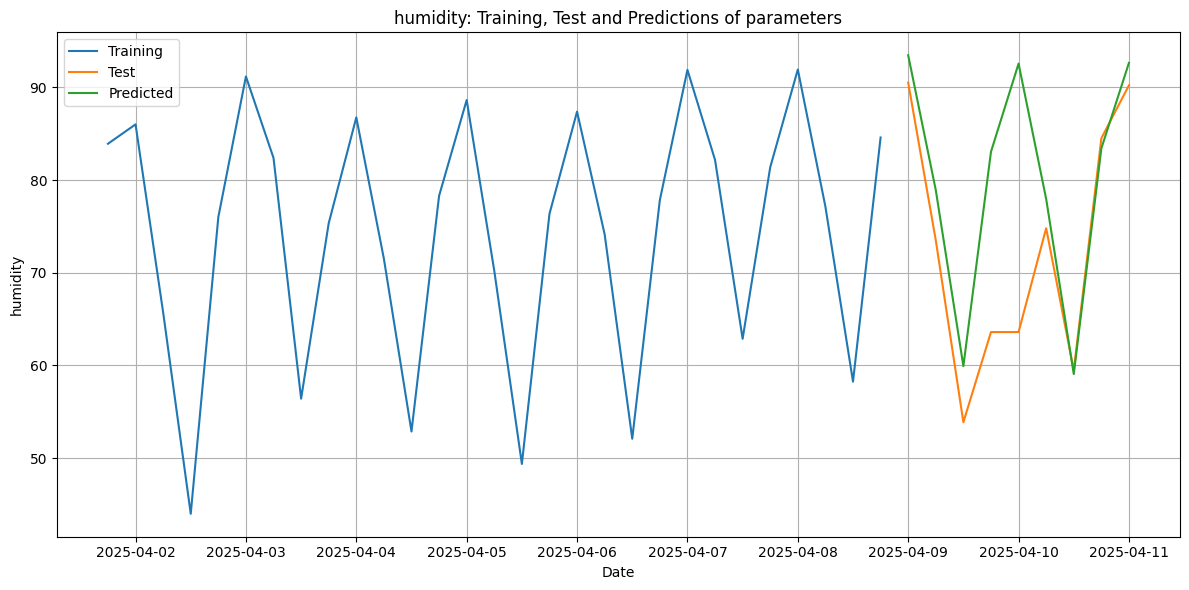

RMSE is :  12.056857407830474


In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data[attr], label="Training")
plt.plot(test_data.index, test_data[attr], label="Test")
plt.plot(test_data.index, attr_prediction, label="Predicted")

plt.legend()
plt.xlabel("Date")
plt.ylabel(attr)
plt.title(f"{attr}: Training, Test and Predictions of parameters")
plt.grid(True)
plt.tight_layout()
plt.show()

print("RMSE is : ", root_mean_squared_error(test_data[attr], attr_prediction))

## Save the model using pickle

In [ ]:
with open(f"../exports/{attr}_sarima.pkl", "wb") as file:
    pickle.dump(attr_results, file)